In [1]:
# Adapted from Coursera Computational Neuroscience - Quiz 2

In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pickle

from compute import compute_sta, compute_interspike_interval

In [3]:
FILENAME = 'c1p8.pickle'

with open(FILENAME, 'rb') as f:
    data = pickle.load(f)

stim = data['stim']
rho = data['rho']


window = 300  # ms
sampling_period = 2  # in ms; Data downsampled to one value every 2ms
num_timesteps = int(window / sampling_period)

Spike-Triggered Average Stimulus

53583


Text(0.5, 1.0, 'Spike-Triggered Average')

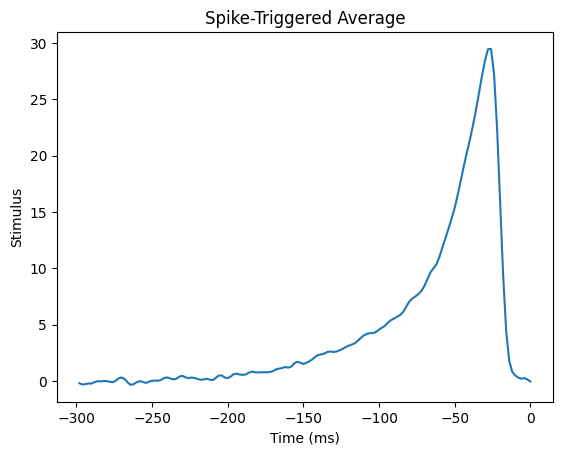

In [4]:
sta = compute_sta(stim, rho, num_timesteps)
time = (np.arange(-num_timesteps, 0) + 1) * sampling_period

plt.plot(time, sta)
plt.xlabel('Time (ms)')
plt.ylabel('Stimulus')
plt.title('Spike-Triggered Average')

Interspike Interval Distribution

In [9]:
intervals = compute_interspike_interval(rho)
mean_intervals = np.mean(intervals)
# Normalize interval data to be between (0, 1)
normalised_intervals = (intervals - mean_intervals) / np.std(intervals)
ep = np.random.exponential(scale=1/mean_intervals, size=intervals.size)

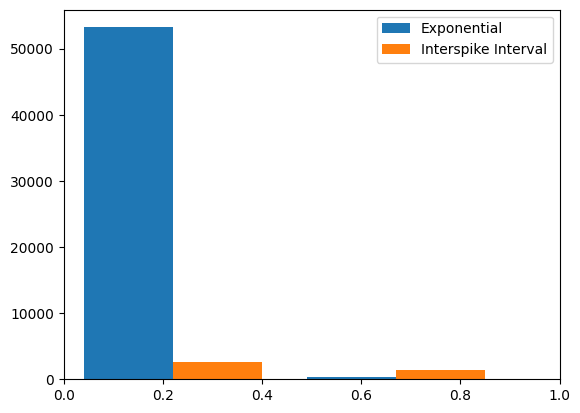

In [10]:
bins = np.linspace(0, 1, 50)
plt.hist([ep, normalised_intervals], bins=30, label=['Exponential', 'Interspike Interval'])
plt.xlim(0, 1)
plt.legend(loc='upper right')
plt.show()

Use Kolmogorov–Smirnov_test to see how the interspike distribution fit with exponential distribution

In [7]:
print(stats.kstest(normalised_intervals, ep))

KstestResult(statistic=0.8293656716417911, pvalue=0.0)
